In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

Numerical solution of 

$ \frac{dy(t)}{dt}=-ky(t) $

## Tidy Equation: Everything known

In [2]:
def model(y,t):
    k = 0.3
    dydt = -k*y
    return dydt

In [13]:
# Initial conditions
y0 = 5

# Time points
t = np.linspace(0, 20, 101)

# Solve ODE
y = odeint(model, y0, t)

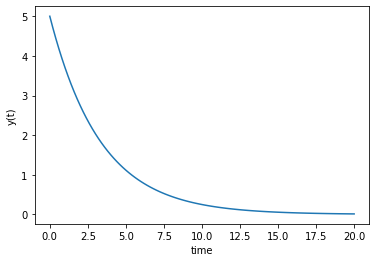

In [14]:
plt.plot(t, y)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()

## Unkown Parameter

In [15]:
def model(y,t,k):
    dydt = -k*y
    return dydt

In [16]:
k=0.1
y1 = odeint(model, y0, t, args=(k,))
k=0.2
y2 = odeint(model, y0, t, args=(k,))
k=0.3
y3 = odeint(model, y0, t, args=(k,))

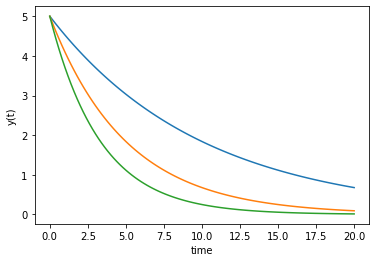

In [17]:
plt.plot(t, y1)
plt.plot(t, y2)
plt.plot(t, y3)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()

## Excercises

### Problem 1

$ \frac{dy(t)}{dt} = -y(t) + 1 $

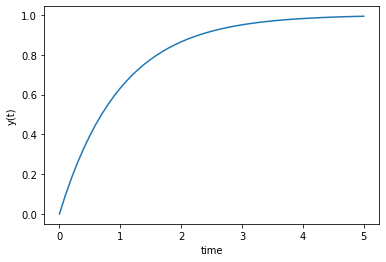

In [21]:
def model(y, t):
    dydt = -y + 1
    return dydt

t = np.linspace(0, 5, 51)

y = odeint(model, 0, t)

plt.plot(t, y)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()

### Problem 2

$ 5\frac{dy(t)}{dt} = -y(t) + u(t) $

$ y(0) = 1 $

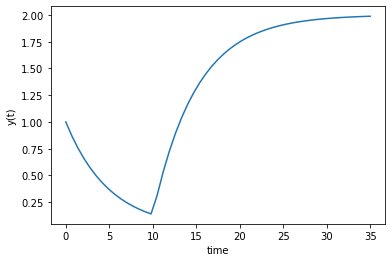

In [34]:
def model(y, t):
    if (t<10.0):
        u = 0.0
    else: 
        u = 2.0
    dydt = -1/5*y + 1/5*u
    return dydt

y0 = 1

t = np.linspace(0, 35, 51)

y = odeint(model, y0, t)

plt.plot(t, y)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()

### Problem 3

$ \frac{dx(t)}{dt} = 3e^{-t} $

$ \frac{dy(t)}{dt} = 3 - y(t) $

$ y(0) = x(0) = 0 $

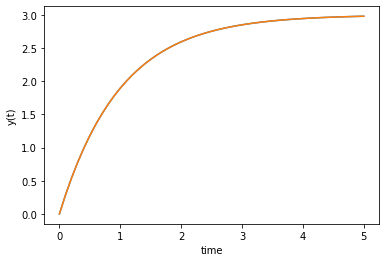

In [35]:
def model(initial, t):
    x = initial[0]
    y = initial[1]
    dxdt = 3.0 * np.exp(-t)
    dydt = 3 - y
    return [dxdt, dydt]

init = [0, 0]

t = np.linspace(0, 5, 51)

diffs = odeint(model, init, t)

x = diffs[:,0]
y = diffs[:,1]

plt.plot(t, x)
plt.plot(t, y)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()

### Problem 3

$ 2\frac{dx(t)}{dt} = -x(t) + u(t) $

$ 5\frac{dy(t)}{dt} = -y(t) + u(t) $

$ u(t) = u(t-5), y(0) = x(0) = 0 $

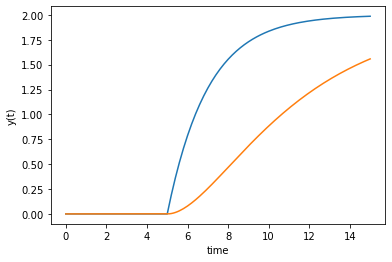

In [57]:
def model(initial, t, u):
    x = initial[0]
    y = initial[1]
    dxdt = (-x + u)/2.0
    dydt = (-y + x)/5.0
    return [dxdt, dydt]

z0 = [0, 0]

# Time points
n = 151
t = np.linspace(0, 15, n)
u = np.zeros(n)
u[51:] = 2.0

x = np.zeros(n)
y = np.zeros(n)

for i in range(1, n):
    tspan = [t[i-1], t[i]]
    z = odeint(model, z0, tspan, args=(u[i], ))
    z0 = z[1]
    x[i] = z0[0]
    y[i] = z0[1]
#     print(f'For i = {i} we have z = {z}')

plt.plot(t, x)
plt.plot(t, y)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()

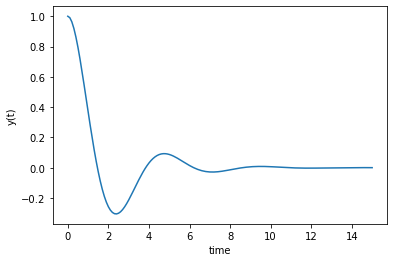

In [53]:
def model(init, t):
    dx1dt = init[1]
    dx2dt = -dx1dt -2*init[0]
    return [dx1dt, dx2dt]

init = [1, 0]

t = np.linspace(0, 15, n)
sol = odeint(model, init, t)

plt.plot(t, sol[:,0])
plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()